Comprobación: 0.901%


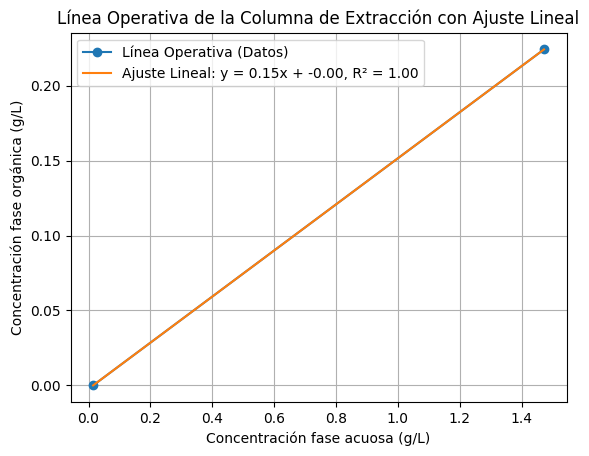

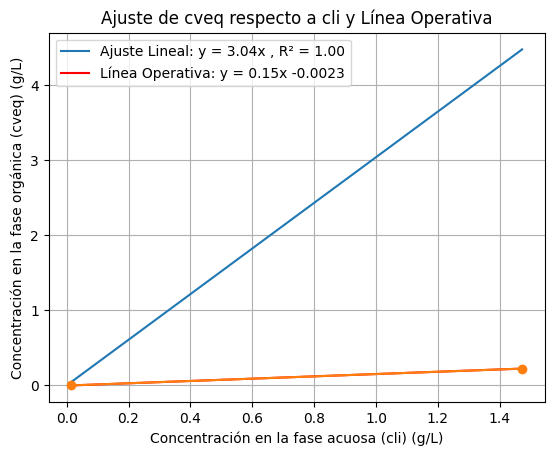

,Parámetro,Valor
0,Fase acuosa (g/L),9.000
1,Fase orgánica (g/L),23.200
2,kd,3.040


,Absorbancia,Valor
0,Refinado,0.132
1,Extracto,0.520
2,Alimentación,1.325


,Intervalo,"[F.o], g/L","[F.a], g/L","[F.o$^*$], g/L",1/(F.o$^*$ - F.o),∫(dC.o / (C.o$^{eq}$ - C.o)
0,0,0.000,0.015,0.045,22.428,4.81e-03
1,100,0.022,0.161,0.488,2.147,4.80e-04
2,200,0.045,0.306,0.932,1.128,2.52e-04
3,300,0.067,0.452,1.375,0.765,1.71e-04
4,400,0.090,0.598,1.819,0.578,1.30e-04
5,500,0.112,0.744,2.262,0.465,1.04e-04
6,600,0.135,0.890,2.706,0.389,8.72e-05
7,700,0.157,1.036,3.149,0.334,7.49e-05
8,800,0.179,1.182,3.593,0.293,6.57e-05
9,900,0.202,1.328,4.036,0.261,5.85e-05


,Concentración,Valor
0,Alimentación (g/L),1.472
1,Refinado (g/L),0.015
2,Extracto (g/L),0.224


,Parámetro,Valor
0,Diámetro (m),5.500e-02
1,Área (m^2),2.376e-03
2,Altura (m),1.000e+00
3,Número de segmentos,1.000e+03


,Parámetro,Valor
0,Tiempo refinado (h),6.000e+01
1,Tiempo extracto (h),3.000e+01
2,Volumen refinado (m$^3$),4.100e-05
3,Volumen extracto (m$^3$),2.200e-05
4,Caudal refinado (m³/s),6.833e-07
5,Caudal extracto (m³/s),7.333e-07


,kla,s$^{-1}$,h$^{-1}$
0,fase acuosa,6.985e-05,2.515e-01
1,fase organica,7.496e-05,2.699e-01


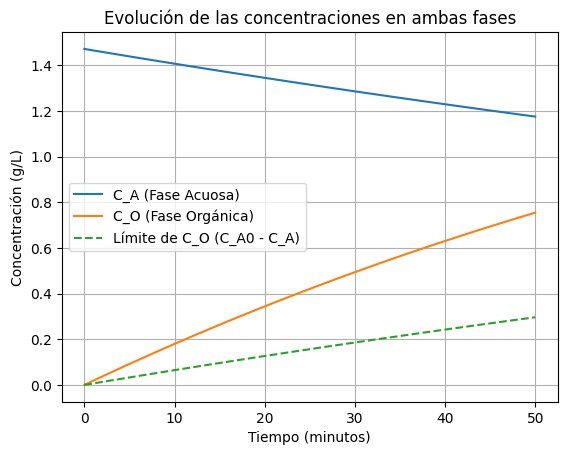

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from IPython.display import display, Markdown
from scipy.integrate import odeint
D = 0.055  # diámetro de la columna (m)
A = np.pi * D**2 / 4  # Área interfacial (m^2)
H = 1  # Altura de la columna (m)
N = 1000  # Número de segmentos en los que se divide la columna para el cálculo

# Rectas de calibración 
Fase_acuosa = 0.009*1000   
Fase_organica = 0.0232*1000   
kd = 3.04  # dato proporcionado

# Datos experimentales
absorbancia_Refinado = 0.132
absorbancia_extracto = 0.52
absorbancia_alimentacion = 1.325
Tiempo_refinado = 60   # s   el nuestro 10.6 
Tiempo_extracto = 30# s 
Volumen_refinado = (41 / 1E6)# ml a m^3
Volumen_extracto = (22 / 1000000)  # ml a m^3
Q_refinado = (Volumen_refinado / Tiempo_refinado)  # m³/s
Q_extracto = (Volumen_extracto / Tiempo_extracto) # m³/s


# Concentraciones mediante las curvas de calibrado
alimentacion = ((absorbancia_alimentacion / Fase_acuosa)*10)  # g/L
disolvente = 1000-alimentacion  # g/L
Refinado = (absorbancia_Refinado / Fase_acuosa)
Extracto = ((absorbancia_extracto / Fase_organica) * 10)

# Comprobacion disolución diluida g_soluto/g_disolvente que será sobre 1L 
comprobacion_d_diluida = (Fase_acuosa / disolvente) * 100  # en %
print(f"Comprobación: {comprobacion_d_diluida:.3f}%")

# Línea operativa: (C. alimentación, C. extracto), (C refinado, 0)
cvacuosa = [alimentacion, Refinado] 
clorg = [Extracto, 0]    
# Ajuste polinómico de grado 1 (recta)
coeficientes = np.polyfit(cvacuosa, clorg, 1)  # Ajuste lineal
polinomio = np.poly1d(coeficientes)  # Genera la función polinómica

# Predicciones basadas en el ajuste
clorg_ajuste = polinomio(cvacuosa)

# Cálculo de R^2
ss_res = np.sum((clorg - clorg_ajuste)**2)  # Suma de los cuadrados de los residuos
ss_tot = np.sum((clorg - np.mean(clorg))**2)  # Suma total de los cuadrados
r2 = 1 - (ss_res / ss_tot)  # Coeficiente de determinación (R^2)

# Gráfico de la línea operativa
# Extraer coeficientes
m, b = coeficientes  # Pendiente y ordenada al origen

# Crear la cadena de la ecuación
equation_str = f'Ecuación: y = {m:.4f}x + {b:.4f}'

# Añadir la ecuación a la leyenda
plt.plot(cvacuosa, clorg, marker='o', label='Línea Operativa (Datos)')
plt.plot(cvacuosa, clorg_ajuste, label=f'Ajuste Lineal: y = {coeficientes[0]:.2f}x + {coeficientes[1]:.2f}, R² = {r2:.2f}')
plt.xlabel('Concentración fase acuosa (g/L)')
plt.ylabel('Concentración fase orgánica (g/L)')
plt.title('Línea Operativa de la Columna de Extracción con Ajuste Lineal')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de la integral
result_integral = 0
cvic = np.zeros(N)  # FASE ORGANICA
cli = np.zeros(N)   # Inicializar array para cli
div = np.zeros(N)   # Inicializar array para div
cveq = np.zeros(N)   # Inicializar array para div
intgr = np.zeros(N-1)  # Inicializar array para intgr (ya que hay N-1 integrales)
for i in range(N):
    cvic[i] = i * (Extracto / (N-1))  # Calcular cvic
    if i == 0:
        cli[i] = Refinado  # Primer valor de cli
    else:
        cli[i] = (cvic[i] - b) / m  # Para i != 0
    cveq[i] = kd * cli[i]  # Línea de equilibrio 
    div[i] = 1 / (cveq[i] - cvic[i])  # Columna de división de la integral

# Realizamos la integración con la fórmula corregida
for i in range(N - 1):
    intgr[i] = (cvic[i+1] - cvic[i]) * ( (div[i] + div[i + 1])/2)
    result_integral += intgr[i]
# Ajuste polinómico entre cli y cveq
coef_ajuste = np.polyfit(cli, cveq, 1)  # Ajuste lineal
polinomio_ajuste = np.poly1d(coef_ajuste)  # Genera la función polinómica

# Predicciones basadas en el ajuste
cveq_ajuste = polinomio_ajuste(cli)

# Cálculo de R^2 para el ajuste
ss_res_ajuste = np.sum((cveq - cveq_ajuste) ** 2)  # Suma de los cuadrados de los residuos
ss_tot_ajuste = np.sum((cveq - np.mean(cveq)) ** 2)  # Suma total de los cuadrados
r2_ajuste = 1 - (ss_res_ajuste / ss_tot_ajuste)  # Coeficiente de determinación (R^2)
# Gráfico del ajuste respecto a la línea operativa
plt.figure()
plt.plot(cli, cveq_ajuste, label=f'Ajuste Lineal: y = {coef_ajuste[0]:.2f}x , R² = {r2_ajuste:.2f}')
plt.plot(cvacuosa, clorg_ajuste, label=f'Línea Operativa: y = {coeficientes[0]:.2f}x {coeficientes[1]:.4f}', color='r')
plt.plot(cvacuosa, clorg, marker='o')
plt.xlabel('Concentración en la fase acuosa (cli) (g/L)')
plt.ylabel('Concentración en la fase orgánica (cveq) (g/L)')
plt.title('Ajuste de cveq respecto a cli y Línea Operativa')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de KLa
Kla = Q_refinado * result_integral/ (A * H)  # en s^-1
Kla_acuosa = (Q_extracto / (A * H)) * result_integral  # en s^-1
klah = ((Q_refinado*3600) / (A * H)) * result_integral  # en s^-1
Kla_acuosah = ((3600*Q_extracto) / (A * H)) * result_integral  # en s^-1

# Tabla 1: Parámetros de la columna
tabla_columna = pd.DataFrame({
    'Parámetro': ['Diámetro (m)', 'Área (m^2)', 'Altura (m)', 'Número de segmentos'],
    'Valor': [D, A, H, N]
})

# Tabla 2: Rectas de calibración
tabla_calibracion = pd.DataFrame({
    'Parámetro': ['Fase acuosa (g/L)', 'Fase orgánica (g/L)', 'kd'],
    'Valor': [Fase_acuosa, Fase_organica, kd]
})

# Tabla 3: Absorbancias
tabla_absorbancias = pd.DataFrame({
    'Absorbancia': ['Refinado', 'Extracto', 'Alimentación'],
    'Valor': [absorbancia_Refinado, absorbancia_extracto, absorbancia_alimentacion]
})

# Tabla 4: Tiempos, volúmenes y caudales
tabla_tiempos_volumenes = pd.DataFrame({
    'Parámetro': ['Tiempo refinado (h)', 'Tiempo extracto (h)', 'Volumen refinado (m$^3$)', 'Volumen extracto (m$^3$)',
                   'Caudal refinado (m³/s)', 'Caudal extracto (m³/s)'],
    'Valor': [Tiempo_refinado, Tiempo_extracto, Volumen_refinado, Volumen_extracto, Q_refinado, Q_extracto]
})

# Tabla 5: Concentraciones
tabla_concentraciones = pd.DataFrame({
    'Concentración': ['Alimentación (g/L)',  'Refinado (g/L)', 'Extracto (g/L)'],
    'Valor': [alimentacion, Refinado, Extracto]
})
tabla_kla = pd.DataFrame({
    'kla' :['fase acuosa','fase organica'],
    's$^{-1}$':[Kla,Kla_acuosa],
    'h$^{-1}$':[klah,Kla_acuosah]
})
numero_del_intervalo = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]

# Crear la tabla con los valores seleccionados
tabla_resultados = pd.DataFrame({
    'Intervalo': numero_del_intervalo,
    '[F.o], g/L': [cvic[i] for i in numero_del_intervalo],
    '[F.a], g/L': [cli[i] for i in numero_del_intervalo],
    '[F.o$^*$], g/L': [cveq[i] for i in numero_del_intervalo],
    '1/(F.o$^*$ - F.o)': [div[i] for i in numero_del_intervalo],
    '∫(dC.o / (C.o$^{eq}$ - C.o)': [f'{intgr[i]:.2e}' if i < N-1 else f'Σ = {np.sum(intgr):.3f}' for i in numero_del_intervalo]
})
#'1/(F_o_eq - F_o)': [div[i] for i in numero_del_intervalo],
# Mostrar la tabla
pd.options.display.float_format = '{:.3f}'.format
display(tabla_calibracion)
display(tabla_absorbancias)
display(tabla_resultados)
display(tabla_concentraciones)
pd.options.display.float_format = '{:.3e}'.format
display(tabla_columna)
display(tabla_tiempos_volumenes)
pd.options.display.float_format = '{:.3e}'.format
display(tabla_kla)


## cosas pendientes representar linea de equilibrio en la linea operativa junto a la ecuacion y r² 
## representar la variacion de concentracion respecto al tiempo
## representar el triangular 
# Parámetros de entrada
C_A0 = alimentacion  # Concentración inicial en la fase acuosa (g/L)
C_O0 = 0.0          # Concentración inicial en la fase orgánica (g/L)
kd = 3.04            # Coeficiente de distribución

# Coeficientes de transferencia de masa (en min^-1)
kLa_acuosa = Kla_acuosa * 60  # Convertido a minutos
kLa_organica = Kla * 60        # Convertido a minutos (asumiendo que ya tienes Kla para la fase orgánica)

# Tiempo de simulación (en minutos)
t = np.linspace(0, 50, 100)  # Tiempo de 0 a 50 minutos

# Definir el sistema de ecuaciones diferenciales
def modelo(y, t, kLa_acuosa, kLa_organica, kd):
    C_A, C_O = y  # Variables dependientes: concentración en fase acuosa y orgánica
    C_O_eq = C_A * kd  # Concentración de equilibrio en la fase orgánica

    # Ecuaciones diferenciales
    dC_A_dt = -kLa_acuosa * C_A 
    dC_O_dt = kLa_organica * (C_O_eq - C_O)  
    return [dC_A_dt, dC_O_dt]

# Resolver la ecuación diferencial
y0 = [C_A0, C_O0]  # Condiciones iniciales [C_A(t=0), C_O(t=0)]

# Integramos las ecuaciones diferenciales
solucion = odeint(modelo, y0, t, args=(kLa_acuosa, kLa_organica, kd))

# Extraer los resultados
C_A = solucion[:, 0]  # Concentraciones fase acuosa
C_O = solucion[:, 1]  # Concentraciones fase orgánica

# Graficar los resultados
plt.figure()
plt.plot(t, C_A, label='C_A (Fase Acuosa)')
plt.plot(t, C_O, label='C_O (Fase Orgánica)')

# Graficar la línea límite de la fase orgánica
C_O_limite = C_A0 - C_A  # Límite máximo de C_O
plt.plot(t, C_O_limite, label='Límite de C_O (C_A0 - C_A)', linestyle='--')

plt.xlabel('Tiempo (minutos)')
plt.ylabel('Concentración (g/L)')
plt.title('Evolución de las concentraciones en ambas fases')
plt.legend()
plt.grid(True)
plt.show()


para el calculo de la variacion de la concentracion respecto del tiempo se ha utilizado \\
Las siguientes ecuaciones diferenciales:
$$
\frac{dC_A}{dt} = -kLa_{acuosa} \cdot \left(C_A - \frac{C_{org}}{kd}\right)
$$
$$
C_{org_{eq}} = C_A \cdot kd
$$
$$
\frac{dC_{org}}{dt} = kLa_{org} \cdot \left(C_{org_{eq}} - C_{org}\right)
$$
Dado que tenemos la constante de reparto k_d = 3.04 , la consideraremos como la concentración de la variación de la concentración de A (soluto en fase acuosa).

La concentración de A debe variar desde el alimento hasta 0, en el caso de que se extraiga totalmente. Por el contrario, en la fase orgánica, la variación de la concentración sigue un comportamiento inverso.

Como la constante de transferencia de masa es diferente para la fase orgánica en comparación con la fase acuosa, la variación de la concentración en la fase orgánica debe ser:

$$
\text{Variación en fase orgánica} = k_{\text{org}} \cdot C_{\text{eq}} - C
$$


Esto implica que, mientras la concentración sea inferior a la del equilibrio, la variación será positiva.


no se esta considerando la difusion por flujo interno solo como la transferencia de masa * la variacion de concentracion con respecto a la del equilibrio que es dada por la constante de reparto